In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import folium
from tqdm import tqdm
import os

In [2]:
# CSV downloaded from https://www.kaggle.com/zusmani/uberdrives
df = pd.read_csv('./My Uber Drives - 2016.csv')

In [3]:
df['START_DATE'] = df['START_DATE'].astype(np.datetime64)
df['END_DATE'] = df['END_DATE'].astype(np.datetime64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


<AxesSubplot:>

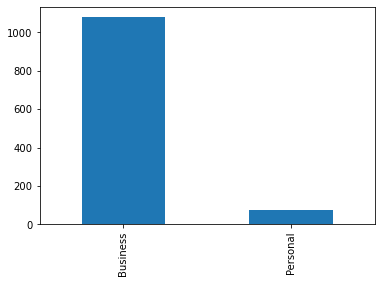

In [4]:
df['CATEGORY'].value_counts().plot(kind='bar')

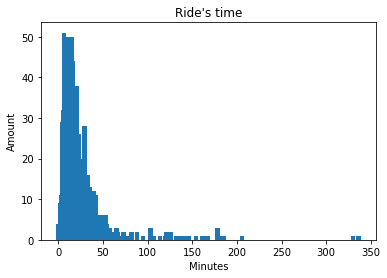

In [5]:
ride_time_lengths = df['END_DATE'] - df['START_DATE']
secs = list(map(lambda rl: rl.seconds // 60, ride_time_lengths))
d = dict()
for length in secs:
    if length in d:
        d[length] += 1
    else:
        d[length] = 1

keys = d.keys()
plt.bar(keys, [d[k] for k in keys], width=5)
plt.title('Ride\'s time')
plt.xlabel('Minutes')
plt.ylabel('Amount')
plt.show()

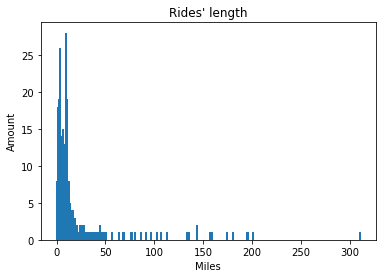

In [6]:
lengths = df['MILES']
d = dict()
for length in lengths:
    if length in d:
        d[length] += 1
    else:
        d[length] = 1
        
keys = d.keys()
#for k in keys:
#    d[k] *= 10
plt.bar(keys, [d[k] for k in keys], width=2)
plt.title('Rides\' length')
plt.xlabel('Miles')
plt.ylabel('Amount')
plt.show()

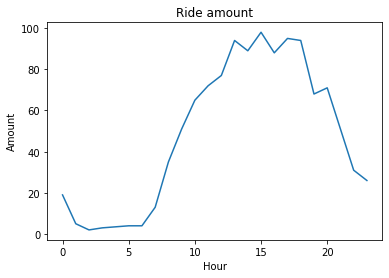

In [7]:
# rides per hour
df['HOUR'] = df['START_DATE'].apply(lambda date: date.hour)
grouped_df = df.groupby('HOUR').aggregate('count')
plt.plot(grouped_df.index, grouped_df['MILES'])
plt.title('Ride amount')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.show()

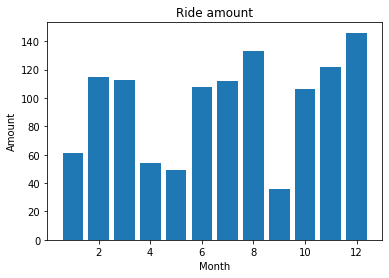

In [8]:
# rides per month
df['MONTH'] = df['START_DATE'].apply(lambda date: date.month)
grouped_df = df.groupby('MONTH').aggregate('count')
plt.bar(grouped_df.index, grouped_df['MILES'])
plt.title('Ride amount')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

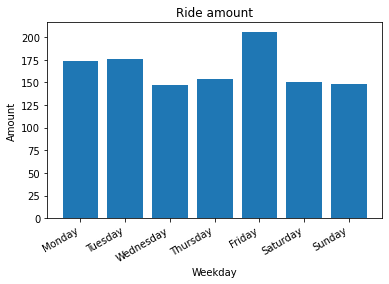

In [9]:
# rides per day in week
df['WEEKDAY'] = df['START_DATE'].apply(lambda date: date.weekday())
grouped_df = df.groupby('WEEKDAY').aggregate('count')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_labels = list(
    map(
        lambda index: days[index],
        grouped_df.index
    )
)
fig, ax = plt.subplots()
ax.bar(x_labels, grouped_df['MILES'])
plt.title('Ride amount')
plt.xlabel('Weekday')
plt.ylabel('Amount')
fig.autofmt_xdate()
plt.show()

In [10]:
#cities = set()
#for city in df['START'].unique():
#    cities.add(city)
#for city in df['STOP'].unique():
#    cities.add(city)
#cities = list(cities)

#from itertools import product
#matrix = np.ndarray(shape=(len(cities), len(cities)), dtype=np.int32)
#for start, stop in map(lambda row: (row[1]['START'], row[1]['STOP']), df.iterrows()):
#    start_index = cities.index(start)
#    stop_index = cities.index(stop)
#    matrix[start_index, stop_index] += 1

#fig, ax = plt.subplots()
#ax.matshow(matrix, cmap='seismic')

#for (i, j), z in tqdm(np.ndenumerate(matrix), total=matrix.shape[0]*matrix.shape[1]):
#    ax.text(i,j, f'{z}', ha='center', va='center')

#plt.title('Places start->stop')
#plt.show()